In [1]:
%reload_ext autoreload
%autoreload 2

In [4]:
from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
)
from ripple_heterogeneity.assembly import assembly_reactivation,find_sig_assembly
from ripple_heterogeneity.readout import assembly_multi_region
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nelpy as nel
# import nelpy.plotting as npl
from matplotlib.ticker import AutoMinorLocator
import os
from scipy import stats
from statannot import add_stat_annotation

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [18]:
basepath = r"Z:\Data\ORproject\OR15\hc280118"


In [19]:
manipulation_epochs = loading.load_manipulation(
    basepath, struct_name="optoStim",return_epoch_array=False
)

display(manipulation_epochs)

manipulation_epochs = loading.load_manipulation(
    basepath, struct_name="optoStim",return_epoch_array=True
)

display(manipulation_epochs)

,start,stop,peaks,center,duration,amplitude,amplitudeUnits,ev_label
0,1.65610,1.75610,1.70610,1.70610,0.1,NaN,au,closed_loop
1,3.64355,3.74355,3.69355,3.69355,0.1,NaN,au,closed_loop
2,6.69620,6.79620,6.74620,6.74620,0.1,NaN,au,closed_loop
3,8.41960,8.51960,8.46960,8.46960,0.1,NaN,au,closed_loop
4,11.10325,11.20325,11.15325,11.15325,0.1,NaN,au,closed_loop
...,...,...,...,...,...,...,...,...
2810,15295.73565,15295.83565,15295.78565,15295.78565,0.1,NaN,au,delayed
2811,15297.35420,15297.45420,15297.40420,15297.40420,0.1,NaN,au,delayed
2812,15304.15070,15304.25070,15304.20070,15304.20070,0.1,NaN,au,delayed
2813,15308.09955,15308.19955,15308.14955,15308.14955,0.1,NaN,au,delayed


{'closed_loop': <EpochArray at 0x1ed0aa113a0: 1,962 epochs> of length 3:16:200 minutes,
 'delayed': <EpochArray at 0x1ed0aa118e0: 853 epochs> of length 1:25:140 minutes}

In [52]:
st,cm = loading.load_spikes(basepath,putativeCellType="Pyr",brainRegion="CA1")
cm = add_new_deep_sup.deep_sup_from_deepSuperficialDistance(cm)


In [26]:
fr_mat = functions.get_participation(st.data,manipulation_epochs['closed_loop'].starts, manipulation_epochs['closed_loop'].stops,par_type="binary")

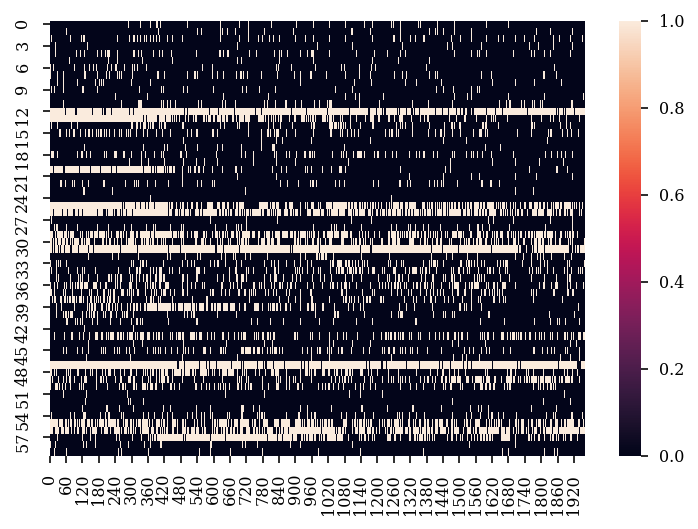

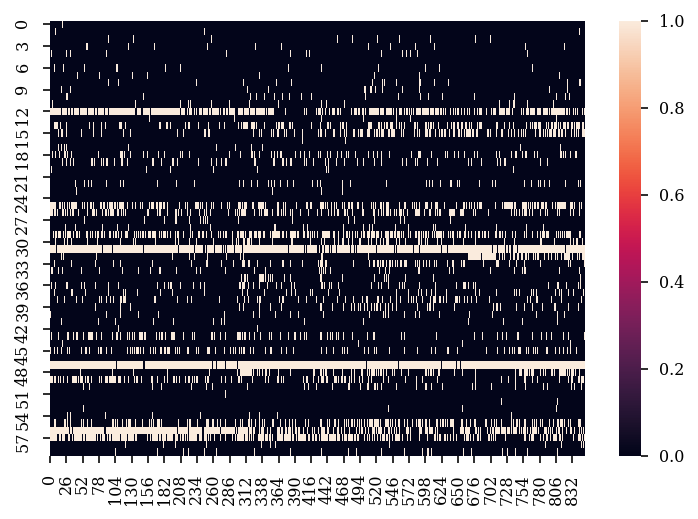

In [46]:
closed_loop = functions.get_participation(st.data,manipulation_epochs['closed_loop'].starts, manipulation_epochs['closed_loop'].stops,par_type="binary")
sns.heatmap(closed_loop)
plt.show()

delayed = functions.get_participation(st.data,manipulation_epochs['delayed'].starts, manipulation_epochs['delayed'].stops,par_type="binary")
sns.heatmap(delayed)
plt.show()

In [67]:
df = pd.DataFrame()
df['participation'] = np.hstack([closed_loop.mean(axis=1),delayed.mean(axis=1)])
df['stim_type'] = np.hstack([np.repeat('closed_loop',closed_loop.shape[0]),np.repeat('delayed',delayed.shape[0])])
df['deepSuperficial'] = np.hstack([cm.deepSuperficial,cm.deepSuperficial])
df

,participation,stim_type,deepSuperficial
0,0.034659,closed_loop,Deep
1,0.033639,closed_loop,middle
2,0.097859,closed_loop,Deep
3,0.020897,closed_loop,middle
4,0.094292,closed_loop,Deep
...,...,...,...
115,0.291911,delayed,middle
116,0.624853,delayed,middle
117,0.509965,delayed,Deep
118,0.022274,delayed,middle


<AxesSubplot:xlabel='stim_type', ylabel='participation'>

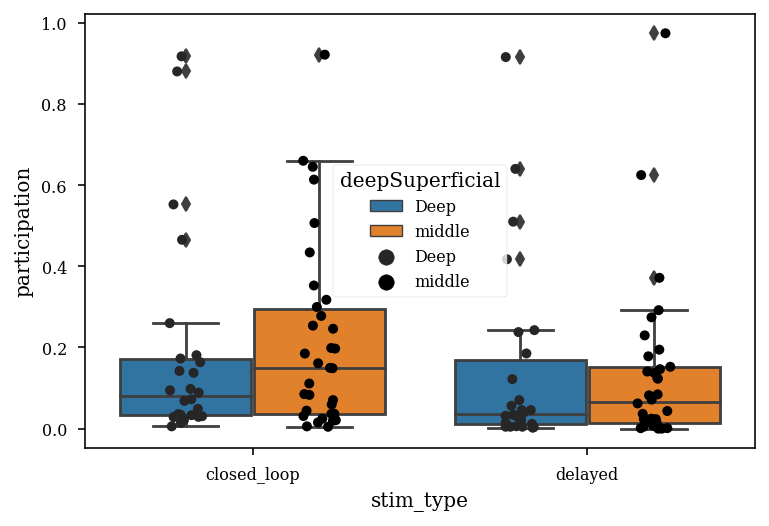

In [72]:
sns.boxplot(x='stim_type',y='participation',hue="deepSuperficial",data=df)
sns.stripplot(x='stim_type',y='participation',hue="deepSuperficial",data=df,dodge=True,color="black")

<AxesSubplot:xlabel='stim_type', ylabel='participation'>

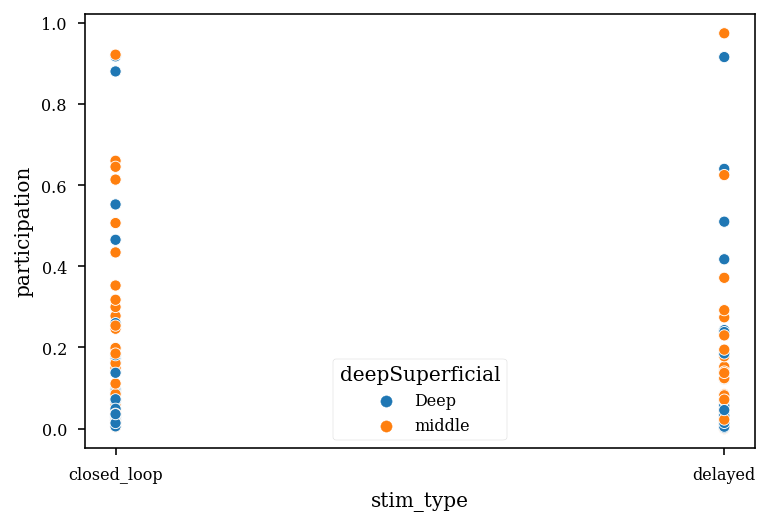

In [69]:
sns.scatterplot(x='stim_type',y='participation',hue='deepSuperficial',data=df)

(0.0, 1.0)

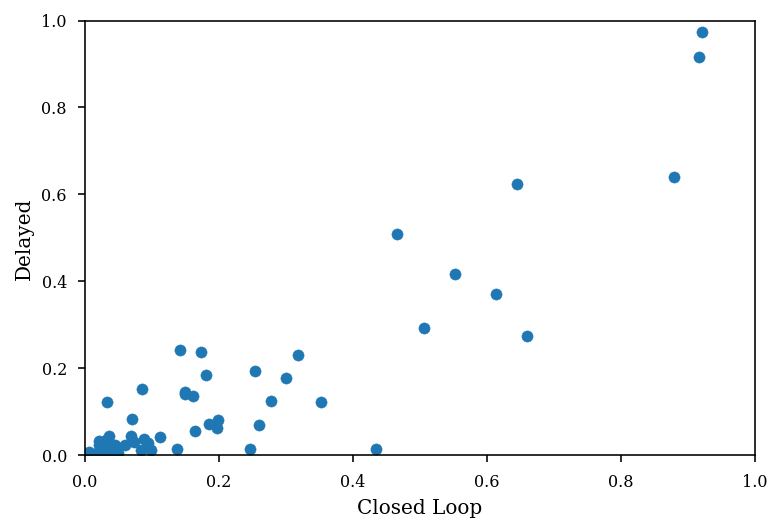

In [51]:
plt.scatter(closed_loop.mean(axis=1),delayed.mean(axis=1))
plt.xlabel("Closed Loop")
plt.ylabel("Delayed")
plt.xlim([0,1])
plt.ylim([0,1])

In [45]:
closed_loop.T @ delayed.T

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 853 is different from 60)

In [40]:
pearson = np.corrcoef(closed_loop,delayed)

sns.heatmap(pearson,cmap="RdBu_r",vmin=-.5,vmax=.5)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1962 and the array at index 1 has size 853